In [ ]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from google.colab.patches import cv2_imshow

Upload 'pic3.png' file manually to your google colab working directory:

1. Click on the folder drawing button on the left below the <> sign.
2. Click on Upload to session storage button to upload the image.

In [17]:
img = cv2.imread("pic3.png")

In [18]:
def resize_nn(img, k=1):
    '''
    Write a program to resample the given image by a factor 'k' using Nearest Neighbour method
    
    Inputs:
    + img - Original image
    + k - resampling factor, therefore if input image size is 300x300 
        - and k=0.5 ==> output image size = 150x150
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    #############################
    # Start your code from here #
    m=img
 # determining the length of original image
    w, h = m.shape[:2];
 
 # xNew and yNew are new width and
# height of image required

    xNew = int(w *k);
    yNew = int(h * k);
 
 # calculating the scaling factor
 # work for more than 2 pixel
    xScale = xNew/(w-1);
    yScale = yNew/(h-1);
 
  # using numpy taking a matrix of xNew
# width and yNew height with
# 4 attribute [alpha, B, G, B] values
    newImage = np.zeros([xNew, yNew, 3]);
 
    for i in range(xNew-1):
        for j in range(yNew-1):
              newImage[i + 1, j + 1]= m[1 + int(i / k),
                                 1 + int(j / k)]
    #############################
    
    # Replace with your code...
    
    #############################
    # End your code here ########
    #############################    
    
    return newImage

In [25]:
def resize_bilinear(img, k=1):
    '''
    Write a program to resample the given image by a factor 'k' using Bilinear interpolation method.
    
    Inputs:
    + img - Original image
    + k - resampling factor
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    #############################
    # Start your code from here #
    img_height, img_width = img.shape[:2]
    height=int(img_height*k)
    width=int(img_width*k)

    resized = np.empty([height, width,3],np.uint8)

    x_ratio = float(img_width - 1) / (width - 1) if width > 1 else 0
    y_ratio = float(img_height - 1) / (height - 1) if height > 1 else 0

    for i in range(height):
        for j in range(width):

            x_l, y_l = math.floor(x_ratio * j), math.floor(y_ratio * i)
            x_h, y_h = math.ceil(x_ratio * j), math.ceil(y_ratio * i)

            x_weight = (x_ratio * j) - x_l
            y_weight = (y_ratio * i) - y_l

            a = img[y_l, x_l]
            b = img[y_l, x_h]
            c = img[y_h, x_l]
            d = img[y_h, x_h]

            pixel = a * (1 - x_weight) * (1 - y_weight)+ b * x_weight * (1 - y_weight) +c * y_weight * (1 - x_weight) +d * x_weight * y_weight

            resized[i][j] = pixel
    #############################
    
    # Replace with your code...
    
    #############################
    # End your code here ########
    #############################    
    
    out_img=resized
    return np.uint8(out_img)

# Checking the output:

Resize the image by utilizing output1 and output2 in the code block below and plot the original and resized images side by side in both cases.


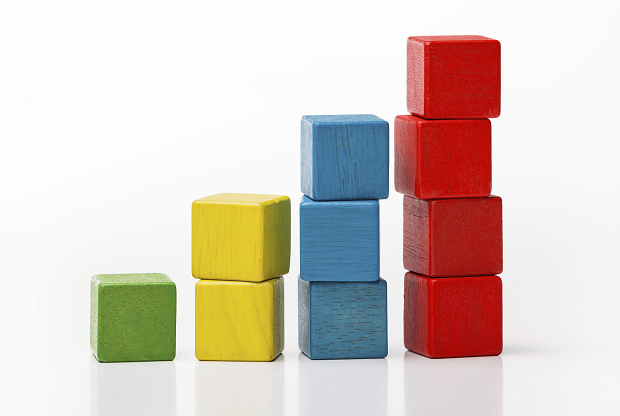

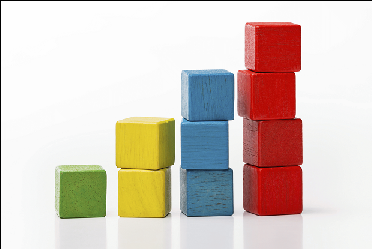

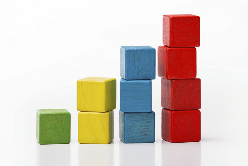

In [27]:
output1 = resize_nn(img, k=0.6)

output2 = resize_bilinear(img, k=0.4) 

#############################
# Start your code from here #
cv2_imshow(img)
cv2_imshow(output1)
cv2_imshow(output2)
#############################

# Replace with your code...

#############################
# End your code here ########
#############################

In [ ]:
your_observation = """
Replace this with your observations in atleast 5 points.
"""

print(your_observation)